In [1]:
## uncomment these if you upload this on google drive and mount the drive
# from google.colab import drive
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
# drive.mount('/content/gdrive', force_remount=True)

#### Q1. Loading Data 

Run the below cell to load CIFAR-10 train and test data. 
Answer the corresponding questions in the overleaf document

In [2]:
## Define transforms to apply on images
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

## defining training and test data
train_data = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_data = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

\
## creating data loaders
batch_size = 4 ## set the batch size value 
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False, num_workers=2)

## image labels in cifar 10
class_labels = classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:03<00:00, 48576876.11it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


### Helper function 
To display images in the training set

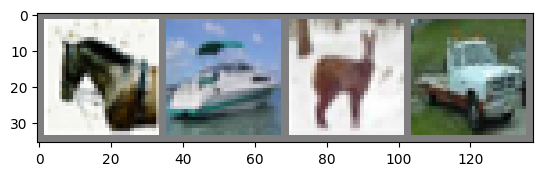

horse  ship  deer truck


In [3]:
# function to display images in the training set 
def display(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


## displaying images in 1 batch of the training set

# get 1 batch of training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
display(torchvision.utils.make_grid(images[0:4]))
# print labels
print(' '.join('%5s' % class_labels[labels[j]] for j in range(4)))


### Q2. Classifier Architecture 

In [4]:
## Defining Classifier architecture 

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, stride=1, padding=0)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=0)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

### Q3. Training the network

(i) Training on CPU 

[1, 250] loss: 2.304
[1, 500] loss: 2.300
[1, 750] loss: 2.298
[1, 1000] loss: 2.290
[1, 1250] loss: 2.268
[1, 1500] loss: 2.203
[1, 1750] loss: 2.095
[1, 2000] loss: 2.037
[1, 2250] loss: 1.985
[1, 2500] loss: 1.950
[1, 2750] loss: 1.952
[1, 3000] loss: 1.864
[1, 3250] loss: 1.844
[1, 3500] loss: 1.792
[1, 3750] loss: 1.752
[1, 4000] loss: 1.762
[1, 4250] loss: 1.709
[1, 4500] loss: 1.718
[1, 4750] loss: 1.691
[1, 5000] loss: 1.683
[1, 5250] loss: 1.633
[1, 5500] loss: 1.668
[1, 5750] loss: 1.694
[1, 6000] loss: 1.646
[1, 6250] loss: 1.564
[1, 6500] loss: 1.600
[1, 6750] loss: 1.553
[1, 7000] loss: 1.555
[1, 7250] loss: 1.519
[1, 7500] loss: 1.527
[1, 7750] loss: 1.530
[1, 8000] loss: 1.506
[1, 8250] loss: 1.533
[1, 8500] loss: 1.494
[1, 8750] loss: 1.486
[1, 9000] loss: 1.533
[1, 9250] loss: 1.511
[1, 9500] loss: 1.477
[1, 9750] loss: 1.478
[1, 10000] loss: 1.400
[1, 10250] loss: 1.469
[1, 10500] loss: 1.457
[1, 10750] loss: 1.429
[1, 11000] loss: 1.418
[1, 11250] loss: 1.460
[1, 115

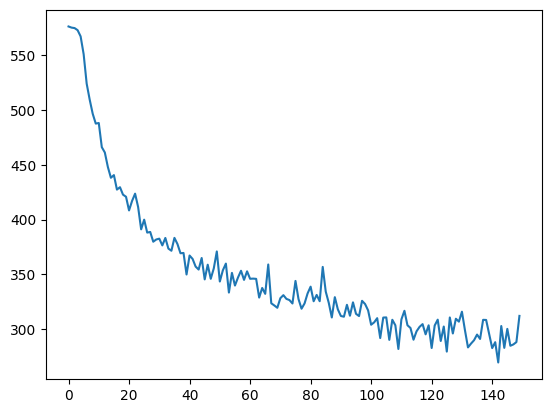

In [5]:
### Complete the code in the training box 

## for reproducibility
torch.manual_seed(7)
np.random.seed(7)

## Instantiating classifier
net = Net()

## Defining optimizer and loss function
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


## Defining Training Parameters

num_epochs = 3 # 2 for CPU training, 10 for GPU training
running_loss_list = [] # list to store running loss in the code below 
for epoch in range(num_epochs):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        #===============================================#
        # Fill in the training loop here. 
        loss = criterion(net(inputs), labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        #===============================================#
        # print statistics
        running_loss += loss.cpu().item()
        if i % 250 == 249:    # print every 250 mini-batches
            print('[{}, {}] loss: {:.3f}'.format(epoch + 1, i + 1, running_loss / 250))
            running_loss_list.append(running_loss)
            running_loss = 0.0
            
print('Training Complete')
PATH = './net.pth'
torch.save(net.state_dict(), PATH)

## complete the code to plot the running loss per 250 mini batches curve

def plot_loss_curve(running_loss_list):
  ## complete code 
  plt.plot(running_loss_list)
plot_loss_curve(running_loss_list)

(ii) Paste the above code in the code block below and modify it to use GPUs for training 


[1, 250] loss: 2.304
[1, 500] loss: 2.300
[1, 750] loss: 2.298
[1, 1000] loss: 2.290
[1, 1250] loss: 2.268
[1, 1500] loss: 2.203
[1, 1750] loss: 2.096
[1, 2000] loss: 2.037
[1, 2250] loss: 1.985
[1, 2500] loss: 1.949
[1, 2750] loss: 1.952
[1, 3000] loss: 1.862
[1, 3250] loss: 1.843
[1, 3500] loss: 1.789
[1, 3750] loss: 1.749
[1, 4000] loss: 1.763
[1, 4250] loss: 1.709
[1, 4500] loss: 1.719
[1, 4750] loss: 1.693
[1, 5000] loss: 1.684
[1, 5250] loss: 1.634
[1, 5500] loss: 1.666
[1, 5750] loss: 1.697
[1, 6000] loss: 1.647
[1, 6250] loss: 1.567
[1, 6500] loss: 1.603
[1, 6750] loss: 1.549
[1, 7000] loss: 1.559
[1, 7250] loss: 1.517
[1, 7500] loss: 1.526
[1, 7750] loss: 1.531
[1, 8000] loss: 1.506
[1, 8250] loss: 1.535
[1, 8500] loss: 1.487
[1, 8750] loss: 1.489
[1, 9000] loss: 1.528
[1, 9250] loss: 1.511
[1, 9500] loss: 1.471
[1, 9750] loss: 1.481
[1, 10000] loss: 1.404
[1, 10250] loss: 1.479
[1, 10500] loss: 1.450
[1, 10750] loss: 1.425
[1, 11000] loss: 1.412
[1, 11250] loss: 1.469
[1, 115

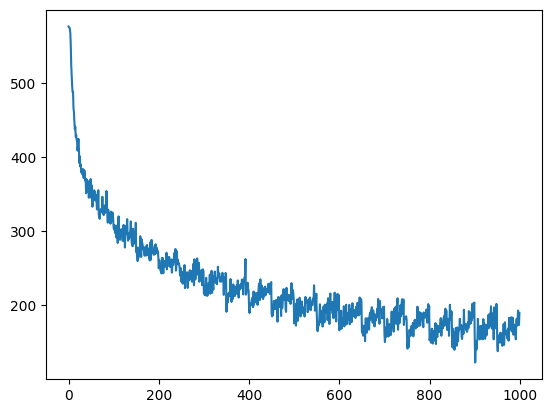

In [6]:
### Copy the code from (i), and modify it to run on GPUs for 20 epochs

## for reproducibility
torch.manual_seed(7)
np.random.seed(7)

## Instantiating classifier
net = Net().cuda()

## Defining optimizer and loss function
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

num_epochs = 20 # 2 for CPU training, 10 for GPU training
running_loss_list = [] # list to store running loss in the code below 
for epoch in range(num_epochs):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        #===============================================#
        # Fill in the training loop here. 
        loss = criterion(net(inputs.cuda()), labels.cuda())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        #===============================================#
        # print statistics
        running_loss += loss.cpu().item()
        if i % 250 == 249:    # print every 250 mini-batches
            print('[{}, {}] loss: {:.3f}'.format(epoch + 1, i + 1, running_loss / 250))
            running_loss_list.append(running_loss)
            running_loss = 0.0
            
print('Training Complete')
PATH = './net.pth'
torch.save(net.state_dict(), PATH)

## complete the code to plot the running loss per 250 mini batches curve

def plot_loss_curve(running_loss_list):
  ## complete code 
  plt.plot(running_loss_list)
plot_loss_curve(running_loss_list)

### Testing the network

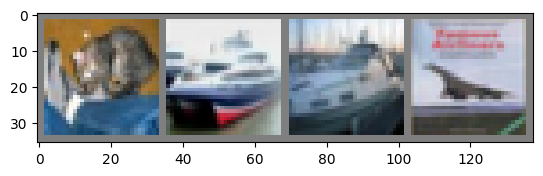

GroundTruth:    cat  ship  ship plane
Predicted:    cat  ship  ship plane


In [8]:
## displaying images from test set 
dataiter = iter(test_loader)
images, labels = next(dataiter)

# print images
display(torchvision.utils.make_grid(images[0:4]))
print('GroundTruth: ', ' '.join('%5s' % class_labels[labels[j]] for j in range(4)))

## Instantiating network and loading the trained model
net = Net()
net.load_state_dict(torch.load(PATH))

## Getting predicted label/class from the model output 
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % class_labels[predicted[j]] for j in range(4)))

(iv) Complete the code below to test the network on the entire testing set. 

In [9]:

### Accuracy on whole data set
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
acc  = correct/total## stores the accuracy computed in the above loop 
print('Accuracy of the network on the 10000 test images: %d %%' % (acc * 100))

Accuracy of the network on the 10000 test images: 60 %


(v) Convert the training code in part (iii) and testing code in part (iv) to define functions `train` and  `test` with function definitions as shown below. Train the network with different batch size and number of epochs. Use the `plot_loss_curve` function you defined in (i) above to plot the loss curves. Use the defined `train` and `test` functions to train the network for various configurations asked in (v) in the problem set. 

In [14]:
def train(train_loader=train_loader, num_epochs=2, use_gpu=False, lr=0.001, momentum=0.9, model_save_path='./net.pth'):
  """
  INPUTS 
  num_epochs: number of training epochs
  use_gpu: False by default. If true, load the model and data to GPU for training
  lr: learning rate for SGD optimizer
  momentum: momentum for SGD optimizer
  model_save_path: save path for the trained model 

  OUTPUTS
  returns running_loss_list: which stores the loss averaged over a minibatch of size 250
  """
  
  ## complete the code.
  ## for reproducibility
  torch.manual_seed(7)
  np.random.seed(7)

  ## Instantiating classifier
  if not use_gpu:
    net = Net()
  else:
    net = Net().cuda()

  ## Defining optimizer and loss function
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(net.parameters(), lr=lr, momentum=momentum)


  ## Defining Training Parameters

  running_loss_list = [] # list to store running loss in the code below 
  for epoch in range(num_epochs):  # loop over the dataset multiple times
      running_loss = 0.0
      for i, data in enumerate(train_loader, 0):
          # get the inputs; data is a list of [inputs, labels]
          inputs, labels = data
          #===============================================#
          # Fill in the training loop here. 
          if not use_gpu:
            loss = criterion(net(inputs), labels)
          else:
            loss = criterion(net(inputs.cuda()), labels.cuda())

          optimizer.zero_grad()
          loss.backward()
          optimizer.step()
          #===============================================#
          # print statistics
          running_loss += loss.cpu().item()
          if i % 250 == 249:    # print every 250 mini-batches
            print('[{}, {}] loss: {:.3f}'.format(epoch + 1, i + 1, running_loss / 250))
            running_loss_list.append(running_loss)
            running_loss = 0.0 

  plot_loss_curve(running_loss_list)

  print('Training Complete')
  torch.save(net.state_dict(), model_save_path)
  
  return running_loss_list

def test(test_loader=test_loader, model_path='./net.pth'):
  ### complete the code to compute accuracy and store it as the variable acc 
  net = Net()
  net.load_state_dict(torch.load(model_path))
  correct = 0
  total = 0
  with torch.no_grad():
      for data in test_loader:
          images, labels = data
          outputs = net(images)
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()
  acc  = correct/total## stores the accuracy computed in the above loop 
  print('Accuracy of the network on the 10000 test images: %d %%' % (acc * 100))

[1, 250] loss: 2.304
[1, 500] loss: 2.300
[1, 750] loss: 2.298
[1, 1000] loss: 2.290
[1, 1250] loss: 2.268
[1, 1500] loss: 2.203
[1, 1750] loss: 2.095
[1, 2000] loss: 2.036
[1, 2250] loss: 1.984
[1, 2500] loss: 1.948
[1, 2750] loss: 1.951
[1, 3000] loss: 1.861
[1, 3250] loss: 1.843
[1, 3500] loss: 1.787
[1, 3750] loss: 1.750
[1, 4000] loss: 1.758
[1, 4250] loss: 1.708
[1, 4500] loss: 1.716
[1, 4750] loss: 1.689
[1, 5000] loss: 1.681
[1, 5250] loss: 1.634
[1, 5500] loss: 1.667
[1, 5750] loss: 1.699
[1, 6000] loss: 1.644
[1, 6250] loss: 1.570
[1, 6500] loss: 1.606
[1, 6750] loss: 1.546
[1, 7000] loss: 1.560
[1, 7250] loss: 1.515
[1, 7500] loss: 1.524
[1, 7750] loss: 1.526
[1, 8000] loss: 1.512
[1, 8250] loss: 1.540
[1, 8500] loss: 1.489
[1, 8750] loss: 1.491
[1, 9000] loss: 1.533
[1, 9250] loss: 1.515
[1, 9500] loss: 1.471
[1, 9750] loss: 1.479
[1, 10000] loss: 1.411
[1, 10250] loss: 1.469
[1, 10500] loss: 1.452
[1, 10750] loss: 1.423
[1, 11000] loss: 1.419
[1, 11250] loss: 1.471
[1, 115

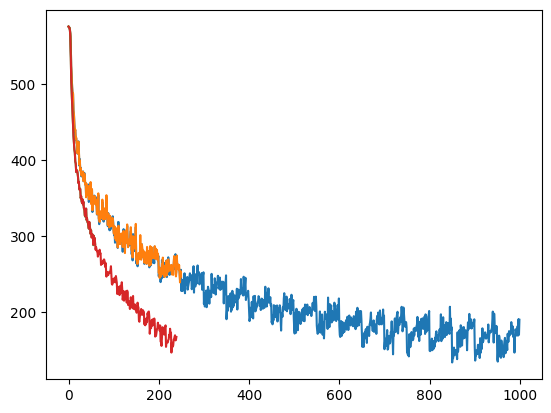

In [26]:
# Batch Size, Epochs
parameters = [(4, 20), (4, 5), (16, 5), (16, 20)]

for batch_size, epochs in parameters:
  loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=2)
  train(train_loader=loader, num_epochs=epochs, use_gpu=True, lr=0.001, momentum=0.9, model_save_path=f'./net-{batch_size}-{epochs}.pth')

[1, 250] loss: 2.304
[1, 500] loss: 2.300
[1, 750] loss: 2.298
[1, 1000] loss: 2.290
[1, 1250] loss: 2.268
[1, 1500] loss: 2.203
[1, 1750] loss: 2.096
[1, 2000] loss: 2.037
[1, 2250] loss: 1.984
[1, 2500] loss: 1.948
[1, 2750] loss: 1.951
[1, 3000] loss: 1.862
[1, 3250] loss: 1.841
[1, 3500] loss: 1.788
[1, 3750] loss: 1.750
[1, 4000] loss: 1.761
[1, 4250] loss: 1.710
[1, 4500] loss: 1.714
[1, 4750] loss: 1.690
[1, 5000] loss: 1.682
[1, 5250] loss: 1.639
[1, 5500] loss: 1.665
[1, 5750] loss: 1.699
[1, 6000] loss: 1.644
[1, 6250] loss: 1.571
[1, 6500] loss: 1.601
[1, 6750] loss: 1.551
[1, 7000] loss: 1.557
[1, 7250] loss: 1.518
[1, 7500] loss: 1.524
[1, 7750] loss: 1.532
[1, 8000] loss: 1.507
[1, 8250] loss: 1.540
[1, 8500] loss: 1.485
[1, 8750] loss: 1.494
[1, 9000] loss: 1.536
[1, 9250] loss: 1.509
[1, 9500] loss: 1.473
[1, 9750] loss: 1.474
[1, 10000] loss: 1.410
[1, 10250] loss: 1.478
[1, 10500] loss: 1.457
[1, 10750] loss: 1.431
[1, 11000] loss: 1.419
[1, 11250] loss: 1.462
[1, 115

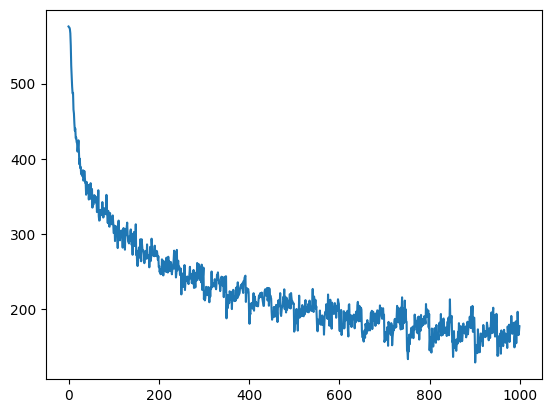

In [22]:
batch_size, epochs = (4, 20)

loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=2)
train(train_loader=loader, num_epochs=epochs, use_gpu=True, lr=0.001, momentum=0.9, model_save_path=f'./net-{batch_size}-{epochs}.pth')

test(test_loader=test_loader, model_path=f'./net-{batch_size}-{epochs}.pth')

[1, 250] loss: 2.304
[1, 500] loss: 2.300
[1, 750] loss: 2.298
[1, 1000] loss: 2.290
[1, 1250] loss: 2.268
[1, 1500] loss: 2.203
[1, 1750] loss: 2.096
[1, 2000] loss: 2.037
[1, 2250] loss: 1.984
[1, 2500] loss: 1.949
[1, 2750] loss: 1.952
[1, 3000] loss: 1.863
[1, 3250] loss: 1.841
[1, 3500] loss: 1.789
[1, 3750] loss: 1.753
[1, 4000] loss: 1.761
[1, 4250] loss: 1.709
[1, 4500] loss: 1.719
[1, 4750] loss: 1.685
[1, 5000] loss: 1.682
[1, 5250] loss: 1.635
[1, 5500] loss: 1.666
[1, 5750] loss: 1.695
[1, 6000] loss: 1.646
[1, 6250] loss: 1.575
[1, 6500] loss: 1.599
[1, 6750] loss: 1.549
[1, 7000] loss: 1.563
[1, 7250] loss: 1.516
[1, 7500] loss: 1.526
[1, 8000] loss: 1.508
[1, 8250] loss: 1.542
[1, 8500] loss: 1.484
[1, 8750] loss: 1.488
[1, 9000] loss: 1.530
[1, 9250] loss: 1.514
[1, 9500] loss: 1.475
[1, 9750] loss: 1.483
[1, 10000] loss: 1.403
[1, 10250] loss: 1.473
[1, 10500] loss: 1.451
[1, 10750] loss: 1.428
[1, 11000] loss: 1.421
[1, 11250] loss: 1.462
[1, 11500] loss: 1.385
[1, 11

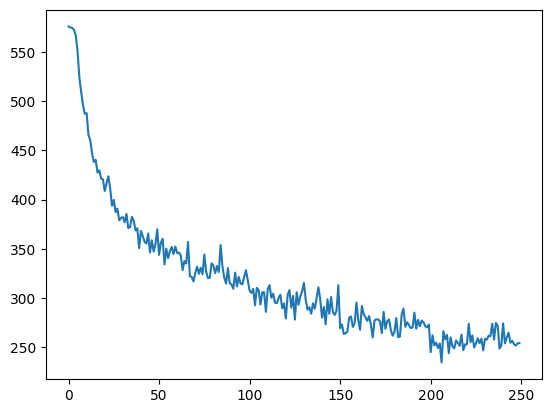

In [23]:
batch_size, epochs = (4, 5)

loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=2)
train(train_loader=loader, num_epochs=epochs, use_gpu=True, lr=0.001, momentum=0.9, model_save_path=f'./net-{batch_size}-{epochs}.pth')

test(test_loader=test_loader, model_path=f'./net-{batch_size}-{epochs}.pth')

[1, 250] loss: 2.303
[1, 500] loss: 2.300
[1, 750] loss: 2.297
[1, 1000] loss: 2.286
[1, 1250] loss: 2.252
[1, 1500] loss: 2.150
[1, 1750] loss: 2.019
[1, 2000] loss: 1.958
[1, 2250] loss: 1.897
[1, 2500] loss: 1.838
[1, 2750] loss: 1.788
[1, 3000] loss: 1.726
[2, 250] loss: 1.693
[2, 500] loss: 1.657
[2, 750] loss: 1.639
[2, 1000] loss: 1.593
[2, 1250] loss: 1.581
[2, 1500] loss: 1.538
[2, 1750] loss: 1.541
[2, 2000] loss: 1.545
[2, 2250] loss: 1.533
[2, 2500] loss: 1.513
[2, 2750] loss: 1.480
[2, 3000] loss: 1.486
[3, 250] loss: 1.446
[3, 500] loss: 1.450
[3, 750] loss: 1.450
[3, 1000] loss: 1.399
[3, 1250] loss: 1.410
[3, 1500] loss: 1.383
[3, 1750] loss: 1.376
[3, 2000] loss: 1.393
[3, 2250] loss: 1.368
[3, 2500] loss: 1.384
[3, 2750] loss: 1.347
[3, 3000] loss: 1.347
[4, 250] loss: 1.310
[4, 500] loss: 1.303
[4, 750] loss: 1.315
[4, 1000] loss: 1.344
[4, 1250] loss: 1.285
[4, 1500] loss: 1.293
[4, 1750] loss: 1.275
[4, 2000] loss: 1.267
[4, 2250] loss: 1.254
[4, 2500] loss: 1.238


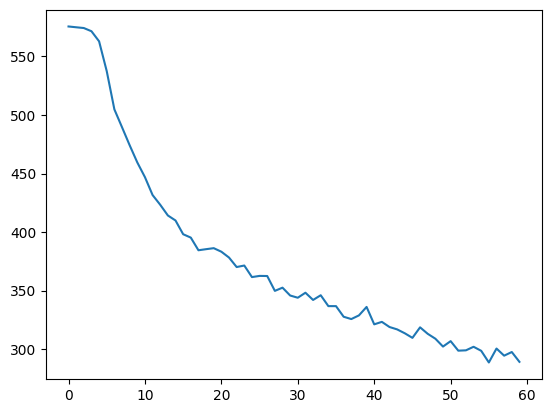

In [24]:
batch_size, epochs = (16, 5)

loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=2)
train(train_loader=loader, num_epochs=epochs, use_gpu=True, lr=0.001, momentum=0.9, model_save_path=f'./net-{batch_size}-{epochs}.pth')

test(test_loader=test_loader, model_path=f'./net-{batch_size}-{epochs}.pth')

[1, 250] loss: 2.303
[1, 500] loss: 2.300
[1, 750] loss: 2.297
[1, 1000] loss: 2.286
[1, 1250] loss: 2.252
[1, 1500] loss: 2.150
[1, 1750] loss: 2.019
[1, 2000] loss: 1.958
[1, 2250] loss: 1.897
[1, 2500] loss: 1.838
[1, 2750] loss: 1.788
[1, 3000] loss: 1.726
[2, 250] loss: 1.692
[2, 500] loss: 1.656
[2, 750] loss: 1.639
[2, 1000] loss: 1.594
[2, 1250] loss: 1.581
[2, 1500] loss: 1.536
[2, 1750] loss: 1.541
[2, 2000] loss: 1.546
[2, 2250] loss: 1.533
[2, 2500] loss: 1.513
[2, 2750] loss: 1.480
[2, 3000] loss: 1.487
[3, 250] loss: 1.448
[3, 500] loss: 1.449
[3, 750] loss: 1.449
[3, 1000] loss: 1.399
[3, 1250] loss: 1.409
[3, 1500] loss: 1.383
[3, 1750] loss: 1.377
[3, 2000] loss: 1.394
[3, 2250] loss: 1.367
[3, 2500] loss: 1.381
[3, 2750] loss: 1.345
[3, 3000] loss: 1.347
[4, 250] loss: 1.310
[4, 500] loss: 1.303
[4, 750] loss: 1.312
[4, 1000] loss: 1.344
[4, 1250] loss: 1.284
[4, 1500] loss: 1.289
[4, 1750] loss: 1.274
[4, 2000] loss: 1.271
[4, 2250] loss: 1.255
[4, 2500] loss: 1.238


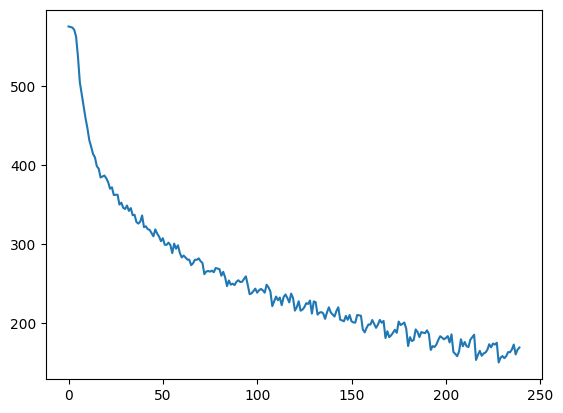

In [25]:
batch_size, epochs = (16, 20)

loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=2)
train(train_loader=loader, num_epochs=epochs, use_gpu=True, lr=0.001, momentum=0.9, model_save_path=f'./net-{batch_size}-{epochs}.pth')

test(test_loader=test_loader, model_path=f'./net-{batch_size}-{epochs}.pth')